**TITANIC DATA SET**

**Data Types / Overview**

**Survived** = Categorical (Survival; 0 = No, 1 = Yes)

**Pclass** = Categorical (Ticket class; 1 = 1st, 2 = 2nd, 3 = 3rd)

**age** = Numerical (Age in years, fractional if less than 1, with some estimated ages)

**SibSp** =Numerical (# of siblings / spouses aboard)
Sibling (brother, sister, stepbrother, stepsister)
Spouse = husband, wife (mistresses and fiancés were ignored)

**Parch** =  Numerical (# of parents / children aboard)
Some children travelled only with a nanny, therefore parch=0 for them

**Ticket** = Alphanumeric (Ticket number)
**Fare** = Numerical (Passenger fare)
**Cabin** = Alphanumeric (Cabin number)
**Embarked** = Categorical (Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton)

**Total number of rows** = 891

**Total number of columns** = 12



In [ ]:
# Import needed libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
# Load the dataset into a Pandas DataFrame and display the first 5 rows.

data_f = pd.read_csv('/content/Titanic-Dataset.csv') # If you run into an encoding error put r before inverted column.

data_f.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Cleaning of data set by doing the following required task**

In [ ]:
# Identify and handle missing values in the dataset. Print the count of missing values for each column.
data_f.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data_f.drop("Cabin", axis =1, inplace= True) # dropped Cabin column because it has a lot of nulls and I don't need it in my analysis.

In [ ]:
data_f.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

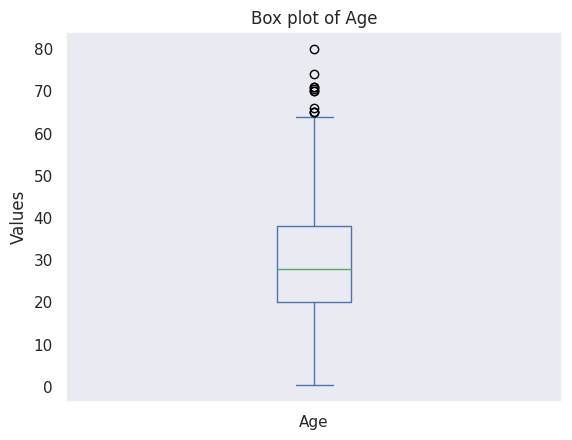

In [ ]:
# To deal with nulls in the age column, check for ouliers using a box plot.
sn.set_style('dark')

data_f['Age'].plot.box()
plt.title("Box plot of Age")
plt.ylabel('Values')

plt.show()


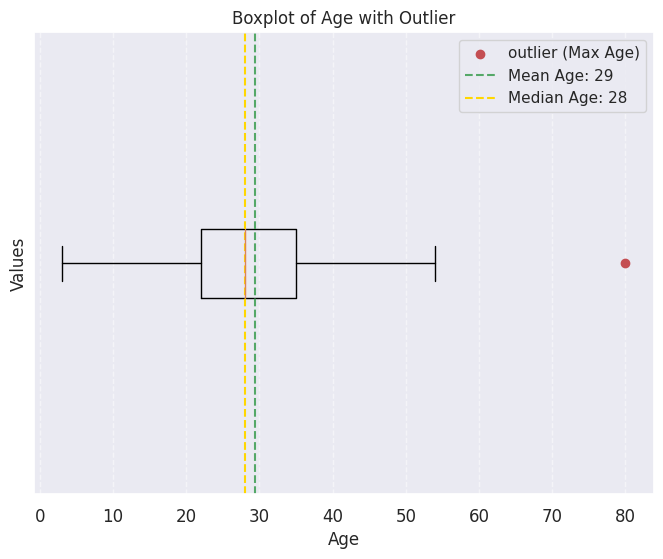

In [ ]:
sn.set_style('dark')

plt.figure(figsize = (8,6))
rounded_age = np.round(data_f['Age'])
min_age = np.min(rounded_age)
max_age = np.max(rounded_age)
outliers = [max_age]

plt.boxplot([rounded_age], vert=False, sym='b', showfliers=False) #disables auto outlier detection
plt.scatter(outliers, [1] * len(outliers), color='r', marker='o', label='outlier (Max Age)') #mark the maximum age as outlier.

plt.xlabel('Age')
plt.ylabel('Values')
plt.title(f'Boxplot of Age with Outlier')

plt.xticks(fontsize = 12)
plt.yticks([])

plt.grid(axis ='x', linestyle='--', alpha= 0.5)

mean_age= np.mean(rounded_age)
plt.axvline(x=mean_age, color='g', linestyle='--', label=f'Mean Age: {mean_age:.0f}')

median_age= data_f['Age'].median()

plt.axvline(x =median_age, color='gold', linestyle='--', label=f'Median Age: {median_age:.0f}')
plt.legend(loc='upper right')

plt.show()

Since the Age column has significant outliers and the mean(average) is sensitive to outliers because it takes into account the magnitude of each data point, the median will be used to replace nulls as it is more robust, and it is not influenced by extreme values or outliers.


In [ ]:
# Replacing null values in the age column with median age

median_age= data_f['Age'].median()
data_f['Age'].fillna(median_age, inplace= True)
data_f.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
# There are two nulls in embarked would love to drop them

clean_data = data_f.dropna()
clean_data.info()
clean_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

In [ ]:
# Calculate and print the basic statistics (mean, median, standard deviation) for numerical columns such as age and fare.

data_f.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# How many passengers survived the Titanic disaster? Print the count and percentage.

numSurvived = data_f['Survived'].sum()
totalPassenger = data_f["PassengerId"].count()
percentSurvived = (numSurvived / totalPassenger) * 100
roundedPercentSurvived = round(percentSurvived, 2)

print("Count of passenger survived the titanic disaster =",numSurvived)
print("percentage of passengers who survived =",roundedPercentSurvived,'%')

# print("Percentage of passengers who survived: {:.2f}%".format(roundedPercentSurvived))

Count of passenger survived the titanic disaster = 342
percentage of passengers who survived = 38.38 %


In [ ]:
# What is the average age of passengers on board? Print the result.

In [ ]:
avgAge = data_f['Age'].median()
print( "Average age of passenger is", avgAge)

Average age of passenger is 28.0


In [ ]:
# How many passengers travelled in each passenger class (Pclass)? Print the count for each class.

Pclass_1 = data_f['Pclass'].value_counts().get(1, 0)
print(Pclass_1,"passengers travelled in pclass_1.")

Pclass_2 = data_f['Pclass'].value_counts().get(2, 0)
print(Pclass_2,"passengers travelled in pclass_2.")

Pclass_3 = (data_f['Pclass'] == 3).sum()
print(Pclass_3,"passengers travelled in pclass_3.")

216 passengers travelled in pclass_1.
184 passengers travelled in pclass_2.
491 passengers travelled in pclass_3.


In [ ]:
# What is the survival rate for male and female passengers separately? Print the survival rate for each gender.

survival_rates = data_f.groupby('Sex')['Survived'].mean()

for sex, mean in survival_rates.items():
    print(f"Survival rate for {sex} passengers: {mean:.2%}")


Survival rate for female passengers: 74.20%
Survival rate for male passengers: 18.89%


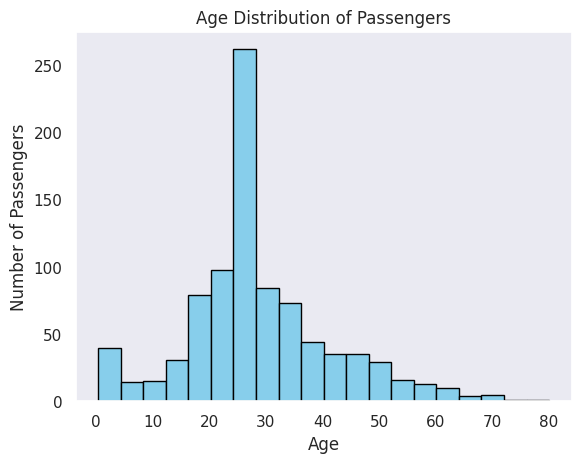

In [ ]:
# Create a histogram showing the distribution of passenger age.

histogram = clean_data['Age'].hist(bins=20, color='skyblue', edgecolor='black', grid=0)
histogram.set_title('Age Distribution of Passengers')
histogram.set_xlabel('Age')
histogram.set_ylabel('Number of Passengers')
histogram.get_figure().show()



This chart offers valuable insights into the age distribution of the Titanic's passengers. It clearly depicts that a substantial portion of passengers falls within the age bracket of 17 to 40 years. This age group constitutes a significant proportion of the overall passenger population aboard the Titanic.

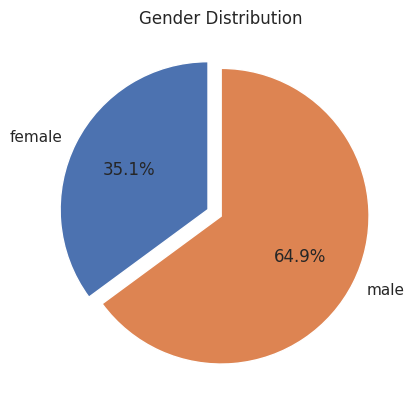

In [ ]:
# Create a pie chart showing the percentage of male and female passengers.

gender= clean_data.groupby('Sex')['PassengerId'].count()
piechart =gender.plot.pie(autopct='%1.1f%%', startangle=90, explode=[.1,0])
piechart.set_title('Gender Distribution')
piechart.set_ylabel("")
piechart.get_figure().show()

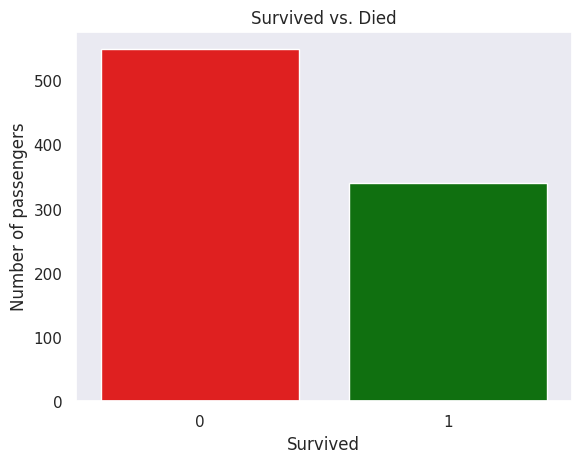

In [ ]:
# How many people survived and died

sn.set_style('dark')
custom_palette = ["red", "green"]
sn.countplot(data=clean_data, x='Survived',palette=custom_palette)
plt.title("Survived vs. Died")
plt.ylabel('Number of passengers')
plt.show()


This bar chart unmistakably illustrates that the number of individuals who perished on the Titanic exceeds the number of survivors. One possible consideration is whether this disparity could be attributed to delayed rescue efforts or assistance.

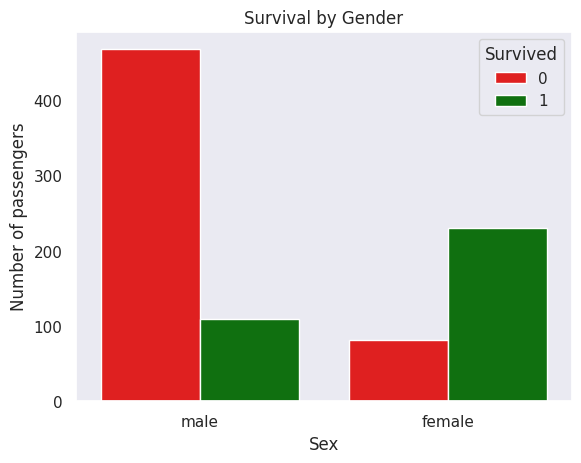

In [ ]:
# Survival by gender

sn.set_style('dark')
custom_palette = ["red", "green"]
sn.countplot(data=clean_data, x='Sex', hue='Survived',palette=custom_palette)
plt.title('Survival by Gender')
plt.ylabel('Number of passengers')
plt.show()

As evident from the chart displayed above, there is a higher number of female survivors compared to male survivors. This observation suggests that gender may have been a factor under consideration even during life-and-death situations.

In [ ]:
ageclass = [0, 18, 65, 100] # creating bin edges as required by the cut function in pandas
label = ['0 - 18', '19 - 65', '66 +']

clean_data['Age_group'] = pd.cut(clean_data['Age'], bins=ageclass, labels=label, right=True);

clean_data.head()

<ipython-input-189-0bfacff136b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Age_group'] = pd.cut(clean_data['Age'], bins=ageclass, labels=label, right=True);


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,19 - 65
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,19 - 65
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,19 - 65
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,19 - 65
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,19 - 65


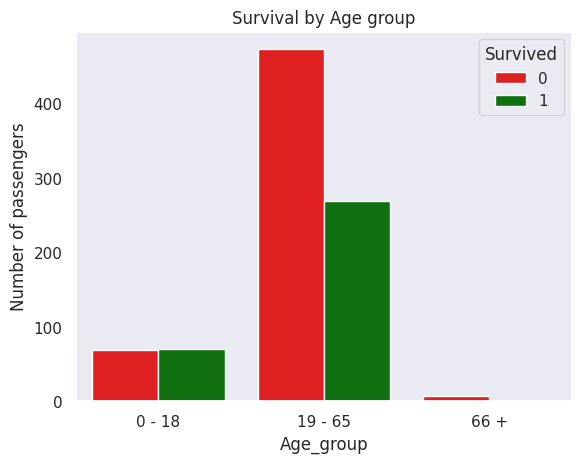

In [ ]:
# Survival by Age group

sn.set_style('dark')

custom_palette = ["red", "green"]
sn.countplot(data=clean_data, x='Age_group', hue='Survived', palette=custom_palette)
plt.title('Survival by Age group')
plt.ylabel('Number of passengers')
plt.show()


While the age group spanning from 19 to 65 demonstrates the highest survival rate in the chart above, it is worth noting that this age range also exhibits a substantial and noteworthy death rate, which surpasses the survival rate.

In [ ]:
embark = clean_data.groupby(["Embarked", "Survived"]).size().reset_index(name="Count")
embark = pd.DataFrame(embark)
embark["Percentage"] = round(embark["Count"] * 100/len(clean_data),2)
embark

,Embarked,Survived,Count,Percentage
0,C,0,75,8.44
1,C,1,93,10.46
2,Q,0,47,5.29
3,Q,1,30,3.37
4,S,0,427,48.03
5,S,1,217,24.41


<ipython-input-192-20ccd0fe13c0>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  em.set_yticklabels([f"{x:g}%" for x in vals], weight = "bold")


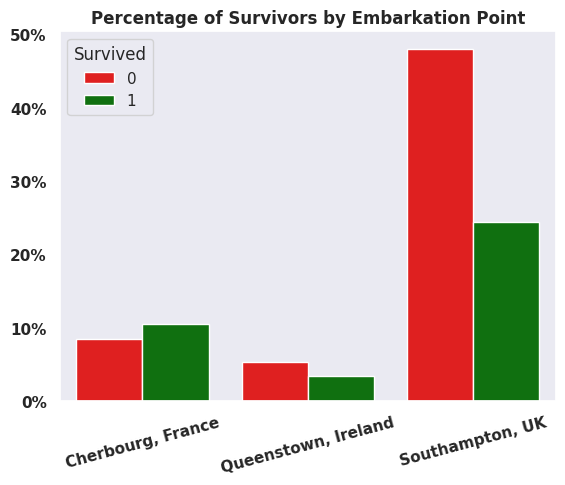

In [ ]:

sn.set(style="dark")
custom_palette = ["red", "green"]
em = sn.barplot(x="Embarked", y="Percentage", data=embark, hue="Survived", palette=custom_palette)
vals = em.get_yticks()
em.set_yticklabels([f"{x:g}%" for x in vals], weight = "bold")
em.set(xlabel= None, ylabel= None)
plt.title("Percentage of Survivors by Embarkation Point", weight="semibold")
plt.xticks([0, 1, 2], ["Cherbourg, France", "Queenstown, Ireland", "Southampton, UK"], rotation=15, fontweight="semibold")

plt.show()



This data reveals that passengers who embarked from Southampton, UK, had both the highest death rate and survival rate, with a noteworthy difference between the death rate, which was significantly higher than the survival rate.

In [ ]:
pclass = clean_data.groupby(["Pclass", "Survived"]).size().reset_index(name="Count")
pclass = pd.DataFrame(pclass)
pclass["Percentage"] = round(pclass["Count"] *100/ len(clean_data),2)
pclass

,Pclass,Survived,Count,Percentage
0,1,0,80,9.00
1,1,1,134,15.07
2,2,0,97,10.91
3,2,1,87,9.79
4,3,0,372,41.84
5,3,1,119,13.39


<ipython-input-194-cc6b5ec9940f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{x:g}%" for x in vals], weight = "bold")


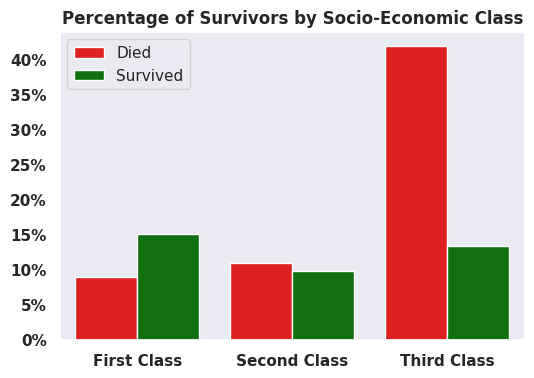

In [ ]:
plt.figure(figsize=(6,4))
sn.set(style="dark")
colour = ["red", "green"]
ax = sn.barplot(x = "Pclass", y = "Percentage", data=pclass, hue="Survived", palette=colour)
ax.set_title("Percentage of Survivors by Socio-Economic Class", weight = "semibold")
ax.set_xticklabels(["First Class", "Second Class", "Third Class"], weight = "bold")
vals = ax.get_yticks()
ax.set_yticklabels([f"{x:g}%" for x in vals], weight = "bold")
ax.set(xlabel= None, ylabel= None)
handles, labels = ax.get_legend_handles_labels()
labels = ["Died", "Survived"]
ax.legend(handles, labels)
plt.show()


This chart clearly indicates that third-class passengers experienced a notably higher mortality rate compared to passengers in other classes.


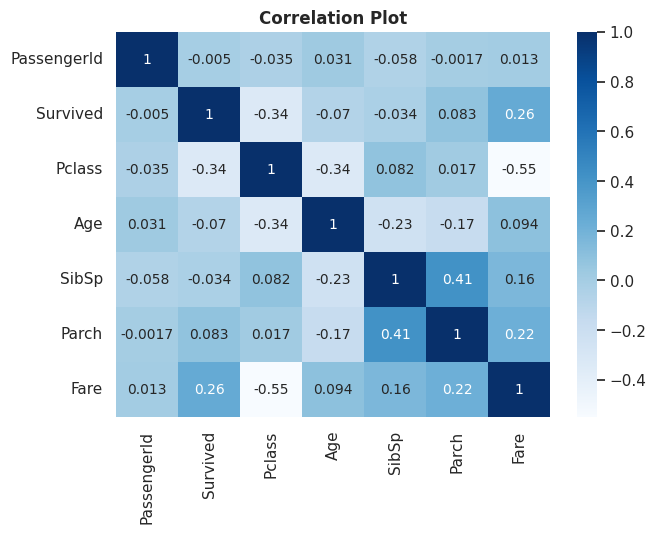

In [ ]:
# Check for Correlation
corr_mat = clean_data.corr(numeric_only=True)
# Showing Correlation Using Heatmap
plt.figure(figsize=(7,5))
sn.heatmap(corr_mat, annot=True, cmap= "Blues", annot_kws={"size":10})
plt.title("Correlation Plot", loc = "center", weight="bold")
plt.show()

The correlation heatmap provides a visual representation of the interrelationships among various variables in our dataset. Each cell within the heatmap portrays the correlation coefficient between two variables, with color intensity serving as an indicator of both the strength and direction of the correlation.

It is readily apparent from the heatmap that the following pairs of variables exhibit strong correlations:

- Fare and Survived

- SibSp (siblings/spouse) and Parch (parents)

- Parch and Fare.